# Project: CMC Water Quality Monitoring

The Chesapeake Monitoring Cooperative (CMC) is a group of leading organizations that provide technical, programmatic, and outreach support in order to integrate volunteer-based and non-traditional water quality and macroinvertebrate monitoring data into the Chesapeake Bay Program partnership. Currently there are many sources of data, including data collected by volunteers, local governments and NGOs, that are not being used to track Bay health. 

My plan for this project is to use the large scale of original data gathered by volunteers to find how to deal with missing values, make more complete time-series graphs, and explore the potential connection between variables for the purpose of inference and prediction. Then we can use the predicted data to verify the actual water quality, which will be helpful to detect the abnormal changes of water quality in time and guide our further actions.

## 1. in a specific station

This part is to explore the water quality at a specifc station across different time. Because there are many missing values collected by volunteers from different stations, we to elimilate NA values to compute a more smooth time-series graph. I accomplish this using moving window functions .ewm, which exponentially weights N* observations, with more recent observations weighted higher, and at the same time, eliminates NA values to compute. This solved the missing data problem and avoided the potential noises in sample data.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


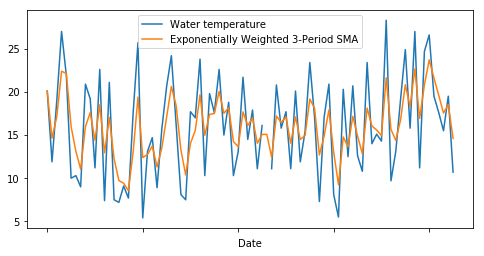

In [37]:
X=df_hier.loc['WL']
X.set_index('Date',inplace=True)
X['Water temperature'].plot(figsize=(8,4))
X['Water temperature'].ewm(span=3).mean().plot()
plt.legend(('Water temperature','Exponentially Weighted 3-Period SMA'))

## 2.exploring water features

This part is mainly about explore features distribution and find potential correlations between these features. I used linear regression and random forest to what variables may affect the water clarity. I also used visualization to see how two variables may correlate with each other. These models can help us use the known data to infer the missing data and predict possible value of a variable in the future. Using these inference and prediction data can reduce the workload of volunteers. Volunteers can also compare the predicted values with actual values to monitor the water quality, making sure the variation of water quality indexes is in a normal range.

In [4]:
#.sort_values(ascending=False)
df11=pd.DataFrame(df)
df1=df.groupby(by='StationName')['Water Clarity','Water temperature','pH','Air temperature','Total Depth','Dissolved oxygen'].mean()
df11=pd.DataFrame(df1)
df11.dropna(axis=0,how='any',inplace=True) 
df11.head(20)

,Water Clarity,Water temperature,pH,Air temperature,Total Depth,Dissolved oxygen
StationName,,,,,,
09-PL21-Sug-SLR4,89.200000,14.500000,7.192500,16.620000,0.160000,6.600000
35,84.600000,10.300000,6.652000,13.860000,0.100000,8.770000
53,89.290476,16.504762,7.262000,17.538095,1.346364,7.345714
ARF,40.913750,18.975000,7.487500,19.800000,0.716250,7.323077
CB1,96.785714,13.971429,6.471429,15.314286,0.114286,7.830000
CM1,39.127273,16.545455,7.771818,18.818182,0.050000,9.327273
CM2,33.445455,15.472727,7.883636,18.154545,0.100000,9.618182
CR5,105.250000,15.066667,6.702500,16.608333,0.236667,7.245833
DEEPRUN_FA,104.933333,14.875000,6.297500,17.750000,0.740000,7.900000


In [5]:
df11['Dissolved oxygen'].isna().sum()

0

### 2.1 linear regression

In [6]:
%pylab inline
import datetime as dt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 40)

Populating the interactive namespace from numpy and matplotlib


In [7]:
X = df11[['Water temperature', 'pH', 'Air temperature', 'Total Depth', 'Dissolved oxygen']]
X = sm.add_constant(X)

In [8]:
y = df11[['Water Clarity']]

In [9]:
# Fit linear regression model and report results
model_liner = sm.OLS(endog=y, exog=X)
results = model_liner.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Water Clarity   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     3.504
Date:                Mon, 06 May 2019   Prob (F-statistic):             0.0143
Time:                        01:55:38   Log-Likelihood:                -153.19
No. Observations:                  33   AIC:                             318.4
Df Residuals:                      27   BIC:                             327.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               264.7498     61.914      4.276      0.000     137.712     391.787
Water temperature    -5.2410      3.543     -1.479      0.151     -12.510       2.028
pH                  -11.0433      9.405     -1.174      0.251     -30.340       8.254
Air temperature      -1.3292      4.378     -0.304      0.764     -10.313       7.654
Total Depth           2.4270      2.866      0.847      0.404      -3.453       8.307
Dissolved oxygen     -0.1310      6.040     -0.022      0.983     -12.525      12.263
==============================================================================
Omnibus:                        2.895   Durbin-Watson:                   2.458
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.501
Skew:                          -0.660   Prob(JB):                        0.286
Kurtosis:                       2.725   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.2 random forest

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [11]:
X.drop('const', axis=1, inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 100)
model2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
model2.score(X_test, y_test)

0.42033480929114886

In [15]:
y_redicted2 = model2.predict(X_test)

### 2.3 visualization

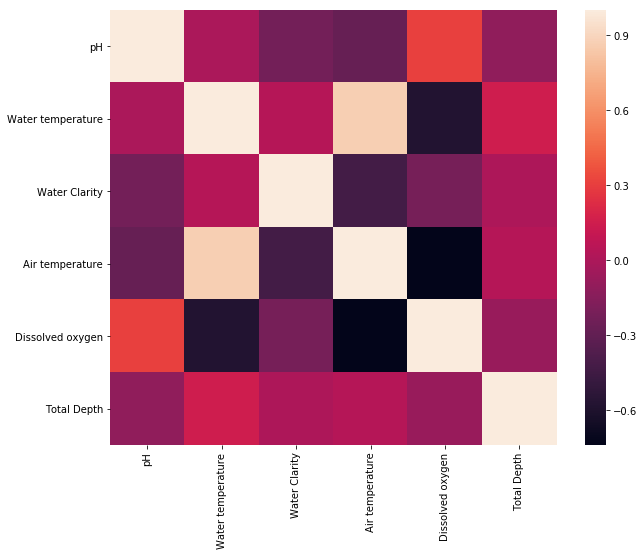

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.iloc[:,[111,177,171,9,75,123]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

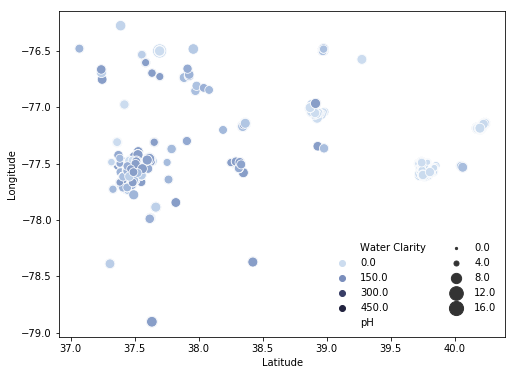

In [17]:
plt.figure(figsize=(8,6))
cmap = sns.cubehelix_palette(rot=-.1, as_cmap=True)
ax = sns.scatterplot(x='Latitude', y='Longitude',
                     hue='Water Clarity', size='pH', palette=cmap, sizes=(5, 200),
                     data=df)
ax.legend(frameon=False, loc='lower right', ncol=2)

## 3.my further work

1.GIS method to enrich simple scatter plot;

2.Improve model accuracy by changing the variables added into models; 

3.Use time series data for prediction on important features.